In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssd_data import InputGenerator

### Split / Merge

In [2]:
from data_voc import GTUtility
gtu_voc = GTUtility('data/VOC2007/')
from data_coco import GTUtility
gtu_coco = GTUtility('data/COCO', validation=True)

In [3]:
gtu_voc_coco = gtu_voc.merge(gtu_coco.convert_to_voc())
#print(gtu_voc_coco)

In [4]:
gtu_train, gtu_val = gtu_coco.split(0.01)

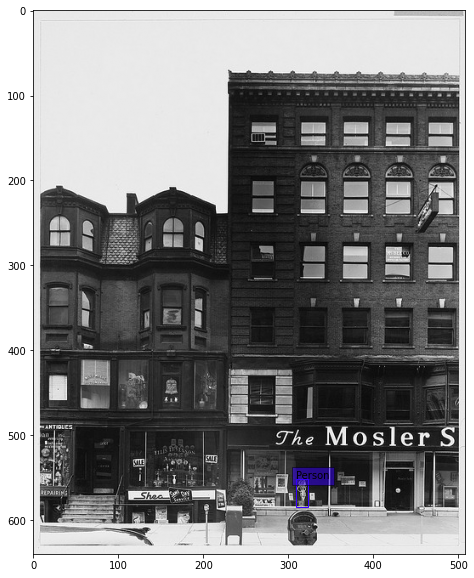

In [5]:
idx, img, gt = gtu_voc_coco.sample()
plt.figure(figsize=[10]*2)
plt.imshow(img)
gtu_voc_coco.plot_gt(gt, show_labels=True)
plt.show()

### Preserve the aspect ratio of the objects

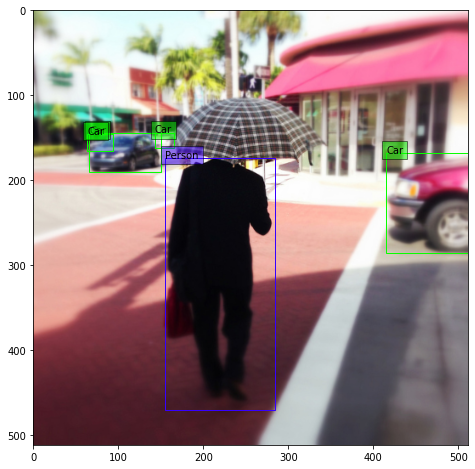

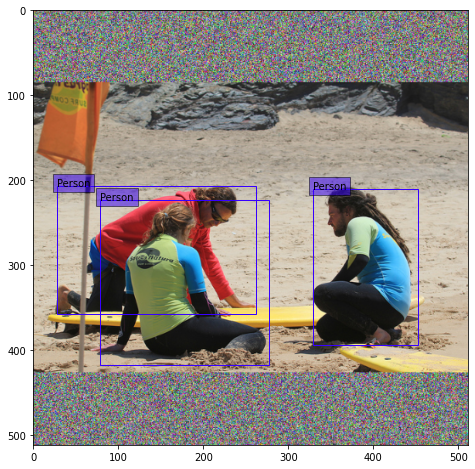

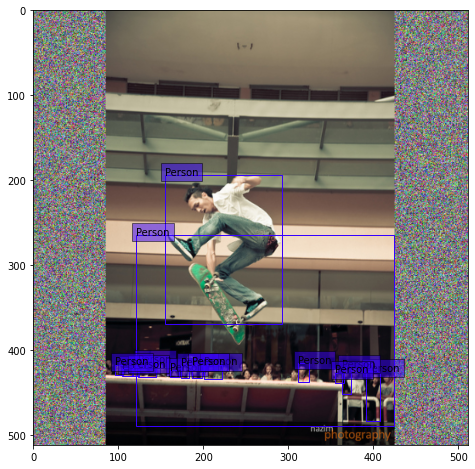

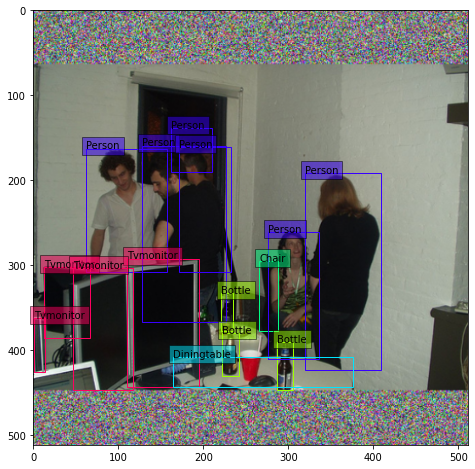

In [6]:
idxs, inputs, images, data = gtu_voc_coco.sample_random_batch(batch_size=4, seed=None, preserve_aspect_ratio=True)

for i in range(len(data)):
    plt.figure(figsize=[8]*2)
    plt.imshow(images[i])
    gtu_voc_coco.plot_gt(data[i])
    plt.show()

### Generator

In [7]:
batch_size = 4
image_size = (512, 512)

class PriorUtilDummy(object):
    def encode(self, gt_data, overlap_threshold=0.5, debug=False):
        #print(type(gt_data), gt_data.shape)
        gt_data = np.zeros((2,10))
        return gt_data

prior_util = PriorUtilDummy()

gen_train = InputGenerator(gtu_train, prior_util, 
        batch_size, image_size,
        augmentation=False,
        hflip_prob=0.5, vflip_prob=0.0, 
        do_crop=True,
        #crop_area_range=[0.75, 1.0],
        crop_area_range=[0.9, 1.0],
        aspect_ratio_range=[3.8/3, 4.2/3])

print(gen_train)

input_size           (512, 512)
batch_size           4
num_samples          401
num_batches          100



In [8]:
g = gen_train.generate(debug=False)
for i in range(200):
    samples = next(g)
    print('.', end='')

........................................................................................................................................................................................................

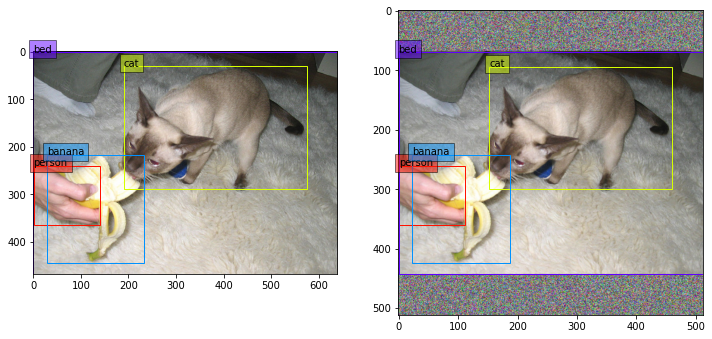

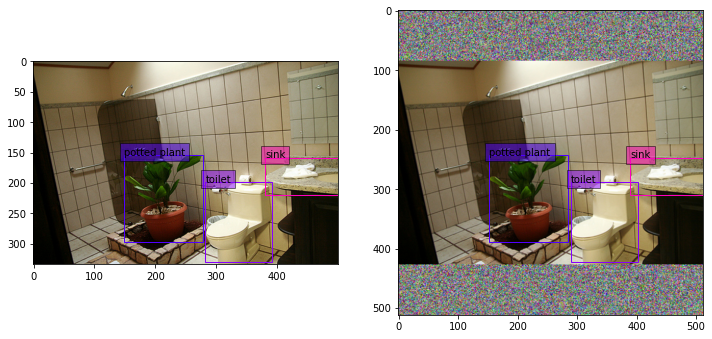

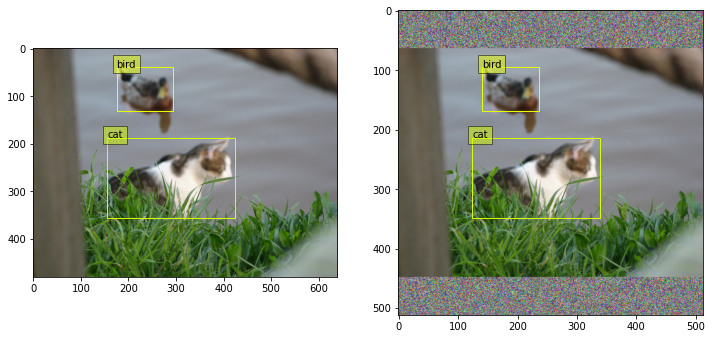

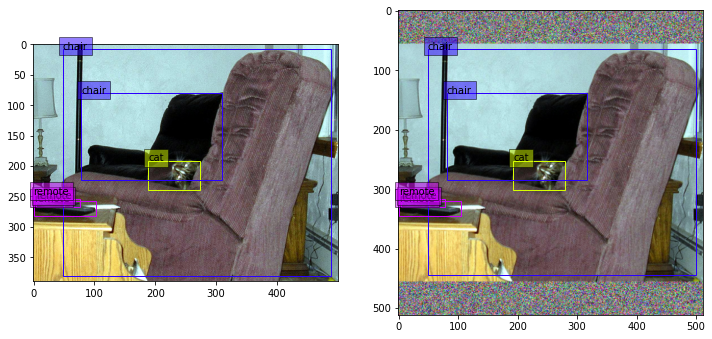

In [9]:
g = gen_train.generate(debug=True)
samples = next(g)